In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
zip_file = keras.utils.get_file(origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
                               fname='cats_and_dogs_filtered.zip',
                               extract=True)
base_dir, _ = os.path.splitext(zip_file)

In [3]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
print('Total training cat images:', len(os.listdir(train_cats_dir)))

train_dogs_dir = os.path.join(train_dir, 'dogs')
print('Total training dog images:', len(os.listdir(train_dogs_dir)))

validation_cats_dir = os.path.join(validation_dir, 'cats')
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


In [15]:
image_size = 160
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (image_size, image_size),
                                                   batch_size = batch_size,
                                                   class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                             target_size=(image_size, image_size),
                                                             batch_size=batch_size,
                                                             class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
image_size = 160
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator_ = train_datagen.flow_from_directory(r"D:\Github\NLP\Artificial_Intelligence_for_NLP\Week_09_0831_kmeans_NN\assignments\notMNIST_large",
                                                   target_size = (image_size, image_size),
                                                   batch_size = batch_size,
                                                   class_mode='binary')
validation_generator_ = validation_datagen.flow_from_directory(r"D:\Github\NLP\Artificial_Intelligence_for_NLP\Week_09_0831_kmeans_NN\assignments\notMNIST_small",
                                                             target_size=(image_size, image_size),
                                                             batch_size=batch_size,
                                                             class_mode='binary')

Found 529119 images belonging to 10 classes.
Found 18726 images belonging to 10 classes.


In [16]:
IMAGE_SHAPE = (image_size, image_size, 3)
base_model = keras.applications.MobileNetV2(input_shape=IMAGE_SHAPE,
                                           include_top=False,
                                           weights='imagenet')

9412608/9406464 [==============================] - 10s 1us/step


In [17]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [18]:
model = keras.Sequential([base_model,
                         keras.layers.GlobalAveragePooling2D(),
                         keras.layers.Dense(1, activation='sigmoid')])

In [19]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=.0001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [22]:
len(model.trainable_variables), train_generator.n

(2, 2000)

In [24]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=epochs,
                             workers=4,
                             validation_data=validation_generator,
                             validation_steps=validation_steps)

Epoch 1/10
62/62 [==============================] - 122s 2s/step - loss: 0.6482 - acc: 0.6280 - val_loss: 0.5782 - val_acc: 0.7067
Epoch 2/10
62/62 [==============================] - 128s 2s/step - loss: 0.5228 - acc: 0.7500 - val_loss: 0.4373 - val_acc: 0.8296
Epoch 3/10
62/62 [==============================] - 123s 2s/step - loss: 0.4410 - acc: 0.8267 - val_loss: 0.3654 - val_acc: 0.8508
Epoch 4/10
62/62 [==============================] - 124s 2s/step - loss: 0.3780 - acc: 0.8577 - val_loss: 0.3001 - val_acc: 0.8810
Epoch 5/10
62/62 [==============================] - 124s 2s/step - loss: 0.3367 - acc: 0.8836 - val_loss: 0.2594 - val_acc: 0.8972
Epoch 6/10
62/62 [==============================] - 124s 2s/step - loss: 0.2996 - acc: 0.9050 - val_loss: 0.2427 - val_acc: 0.8962
Epoch 7/10
62/62 [==============================] - 132s 2s/step - loss: 0.2705 - acc: 0.9116 - val_loss: 0.2344 - val_acc: 0.8992
Epoch 8/10
62/62 [==============================] - 127s 2s/step - loss: 0.2655 - a

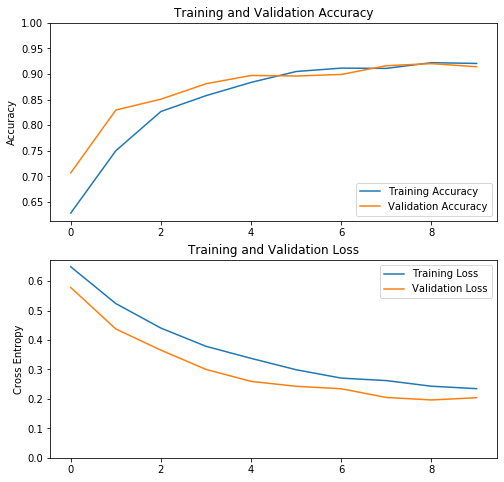

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [27]:
base_model.trainable = True
print('Number of layers in the base model:', len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model: 155


In [28]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [29]:
len(model.trainable_variables)

58

In [30]:
history_fine = model.fit_generator(train_generator,
                                  steps_per_epoch=steps_per_epoch,
                                  epochs=epochs,
                                  workers=4,
                                  validation_data=validation_generator,
                                  validation_steps=validation_steps)

Epoch 1/10
62/62 [==============================] - 174s 3s/step - loss: 0.1644 - acc: 0.9477 - val_loss: 0.1163 - val_acc: 0.9536
Epoch 2/10
62/62 [==============================] - 170s 3s/step - loss: 0.0887 - acc: 0.9746 - val_loss: 0.1088 - val_acc: 0.9556
Epoch 3/10
62/62 [==============================] - 168s 3s/step - loss: 0.0638 - acc: 0.9832 - val_loss: 0.1062 - val_acc: 0.9587
Epoch 4/10
62/62 [==============================] - 169s 3s/step - loss: 0.0388 - acc: 0.9909 - val_loss: 0.1115 - val_acc: 0.9556
Epoch 5/10
62/62 [==============================] - 165s 3s/step - loss: 0.0304 - acc: 0.9939 - val_loss: 0.1054 - val_acc: 0.9577
Epoch 6/10
62/62 [==============================] - 170s 3s/step - loss: 0.0235 - acc: 0.9934 - val_loss: 0.1361 - val_acc: 0.9587
Epoch 7/10
62/62 [==============================] - 172s 3s/step - loss: 0.0155 - acc: 0.9985 - val_loss: 0.1362 - val_acc: 0.9577
Epoch 8/10
62/62 [==============================] - 170s 3s/step - loss: 0.0137 - a

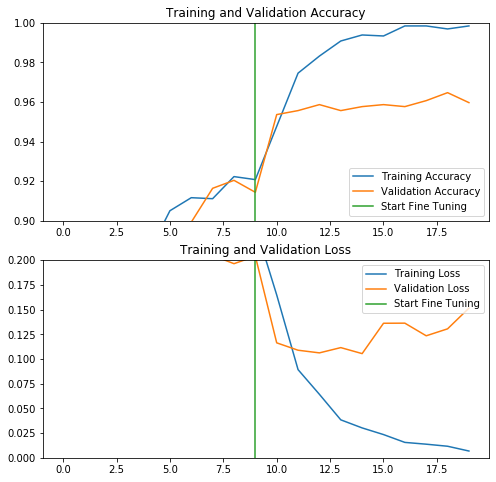

In [31]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# work with more data

### Yield instead of loading

use API to yield data from disk intead of loading to RAM

In [4]:
image_size = 28

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_file,
                                                   target_size = (image_size, image_size),
                                                   class_mode='sparse')

test_generator = test_datagen.flow_from_directory(test_file,
                                                 target_size=(image_size, image_size),
                                                 class_mode='sparse')

Found 529119 images belonging to 10 classes.
Found 18726 images belonging to 10 classes.


In [32]:
model = keras.Sequential([keras.layers.Dense(300, activation=tf.nn.relu, input_shape=(28,28,3)),
                         keras.layers.Dense(300, activation=tf.nn.relu),
                         keras.layers.Dense(10, activation=tf.nn.softmax)])

In [33]:
model.compile(optimizer=keras.optimizers.SGD(.1),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
train_generator.labels.shape

(529119,)

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 28, 28, 300)       1200      
_________________________________________________________________
dense_13 (Dense)             (None, 28, 28, 300)       90300     
_________________________________________________________________
dense_14 (Dense)             (None, 28, 28, 10)        3010      
Total params: 94,510
Trainable params: 94,510
Non-trainable params: 0
_________________________________________________________________


In [35]:
epochs = 10
steps_per_epoch = train_generator.n // 32

history = model.fit_generator(train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=epochs,
                             workers=4)

Epoch 1/10


InvalidArgumentError: logits and labels must have the same first dimension, got logits shape [25088,10] and labels shape [32]
	 [[{{node loss_5/dense_14_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]